In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/fraud_dataset_example.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(101613, 11)

In [4]:
df = df.reindex(columns=['isFraud', 'isFlaggedFraud','step', 'type', 'amount',
                         'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest',
                         'oldbalanceDest', 'newbalanceDest'])

In [5]:
df.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [6]:
new_columns = {
    'isFraud': 'fraude',
    'isFlaggedFraud': 'super_fraude',
    'step': 'tempo',
    'type': 'tipo',
    'amount': 'valor',
    'nameOrig': 'cliente1',
    'oldbalanceOrg': 'saldo_inicial_c1',
    'newbalanceOrig': 'novo_saldo_c1',
    'nameDest': 'cliente2',
    'oldbalanceDest': 'saldo_inicial_c2',
    'newbalanceDest': 'novo_saldo_c2',
}

In [7]:
df = df.rename(columns=new_columns)
df.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [10]:
df.fraude.value_counts()

0    101497
1       116
Name: fraude, dtype: int64

In [11]:
# !pip install pandas-profiling==3.1.0

In [12]:
# import pandas_profiling

# pandas_profiling.ProfileReport(df, title="Pandas Profiling Report", vars={"num": {"low_categorical_threshold": 0}})

In [13]:
df_v1 = pd.get_dummies(df, columns=['tipo'])
df_v1.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [14]:
df_v2 = df_v1.drop(columns=['cliente1', 'cliente2', 'super_fraude'])
df_v2.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [15]:
X = df_v2.drop(columns=['fraude'])
Y = df_v2['fraude']

In [16]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=SEED)

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [18]:
lr.score(X_test, Y_test)

0.9989765391276965

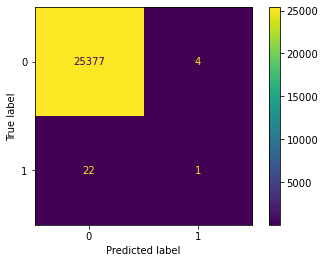

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

predicted = lr.predict(X_test)
cm = confusion_matrix(Y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

In [20]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25381
           1       0.20      0.04      0.07        23

    accuracy                           1.00     25404
   macro avg       0.60      0.52      0.54     25404
weighted avg       1.00      1.00      1.00     25404



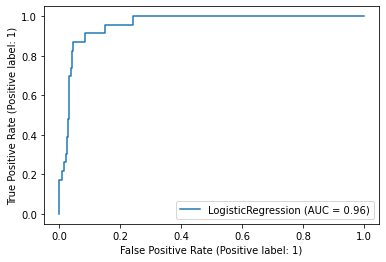

In [21]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, X_test, Y_test)

In [22]:
# !pip install imbalanced-learn

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=SEED)

In [24]:
X = df_v2.drop(columns=['fraude'])
Y = df_v2['fraude']

In [25]:
x_resampled, y_resampled = smote.fit_resample(X, Y)

In [26]:
df_v3 = pd.concat([y_resampled, x_resampled], axis=1)
df_v3.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [27]:
df_v3.shape

(202994, 12)

In [28]:
df_v3.fraude.value_counts()

0    101497
1    101497
Name: fraude, dtype: int64

In [29]:
X = df_v3.drop(columns=['fraude'])
Y = df_v3['fraude']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=SEED)

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(X_train, Y_train)

lr.score(X_test, Y_test)

0.9417722516699837

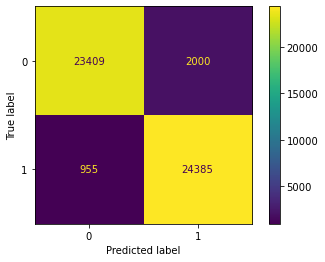

In [30]:
predicted = lr.predict(X_test)
cm = confusion_matrix(Y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

In [31]:
print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     25409
           1       0.92      0.96      0.94     25340

    accuracy                           0.94     50749
   macro avg       0.94      0.94      0.94     50749
weighted avg       0.94      0.94      0.94     50749



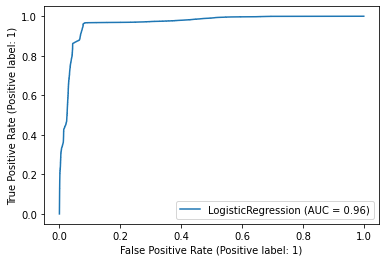

In [32]:
RocCurveDisplay.from_estimator(lr, X_test, Y_test)

In [33]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df_v3, title="Pandas Profiling Report", vars={"num": {"low_categorical_threshold": 0}})

In [34]:
def make_classification(clf, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=SEED)

    clf.fit(X_train, Y_train)
    
    predicted = clf.predict(X_test)
    print(classification_report(Y_test, predicted))
    
    RocCurveDisplay.from_estimator(clf, X_test, Y_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     25409
           1       0.94      0.99      0.96     25340

    accuracy                           0.96     50749
   macro avg       0.96      0.96      0.96     50749
weighted avg       0.96      0.96      0.96     50749



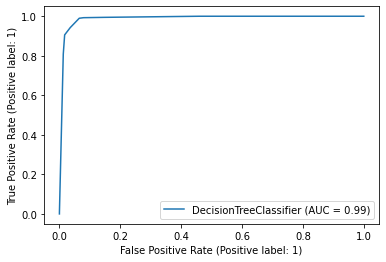

In [38]:
dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)
make_classification(dt, X, Y)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     25409
           1       0.97      0.97      0.97     25340

    accuracy                           0.97     50749
   macro avg       0.97      0.97      0.97     50749
weighted avg       0.97      0.97      0.97     50749



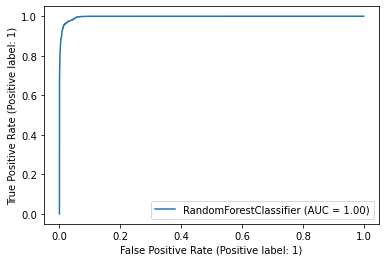

In [39]:
rf = RandomForestClassifier(max_depth=5, random_state=SEED)
make_classification(rf, X, Y)

In [45]:
param_grid = {
    'n_estimators': np.arange(20, 200, step=20),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': np.arange(2, 10, step=1),
    'min_samples_split': np.arange(2, 10, step=2),
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

In [46]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [51]:
random_cv = RandomizedSearchCV(
    rforest,
    param_grid,
    n_iter=10,
    cv=3,
    scoring='recall',
    n_jobs=2,
    random_state=SEED
)

In [52]:
%%time
rcv = random_cv.fit(X, Y)

CPU times: user 1min 25s, sys: 353 ms, total: 1min 25s
Wall time: 8min 49s


In [53]:
rcv.best_params_

{'n_estimators': 160,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': False}

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     25482
           1       0.94      0.99      0.96     25267

    accuracy                           0.96     50749
   macro avg       0.96      0.96      0.96     50749
weighted avg       0.96      0.96      0.96     50749



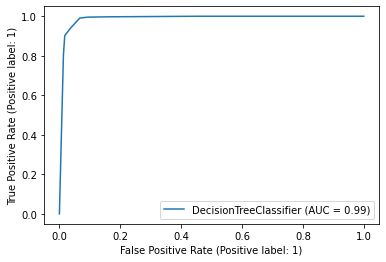

In [54]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)
make_classification(dt, X, Y)